In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train=pd.read_csv("train.csv",index_col=False)
test=pd.read_csv("test_x.csv",index_col=False)

In [3]:
train_labels=['Hour','Minutes', 'Sensor_alpha', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus','Sensor_beta_plus', 'Sensor_gamma_plus']
x=train[train_labels]
y=train['Insect']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

In [5]:

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

print(sorted(Counter(y_resampled).items()))


[(0, 2444), (1, 2444), (2, 2444)]


In [16]:
model = RandomForestClassifier(n_estimators=800, max_depth=300, random_state=0)

# Train the model using the training sets
model.fit(X_resampled,y_resampled)

#Predict Output

model.score(x_test,y_test)

0.8919562113279391

In [17]:
y_pred = model.predict(x_test)
aux=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[980  66  29]
 [ 48 769   5]
 [ 67  12 125]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1075
           1       0.91      0.94      0.92       822
           2       0.79      0.61      0.69       204

    accuracy                           0.89      2101
   macro avg       0.86      0.82      0.84      2101
weighted avg       0.89      0.89      0.89      2101



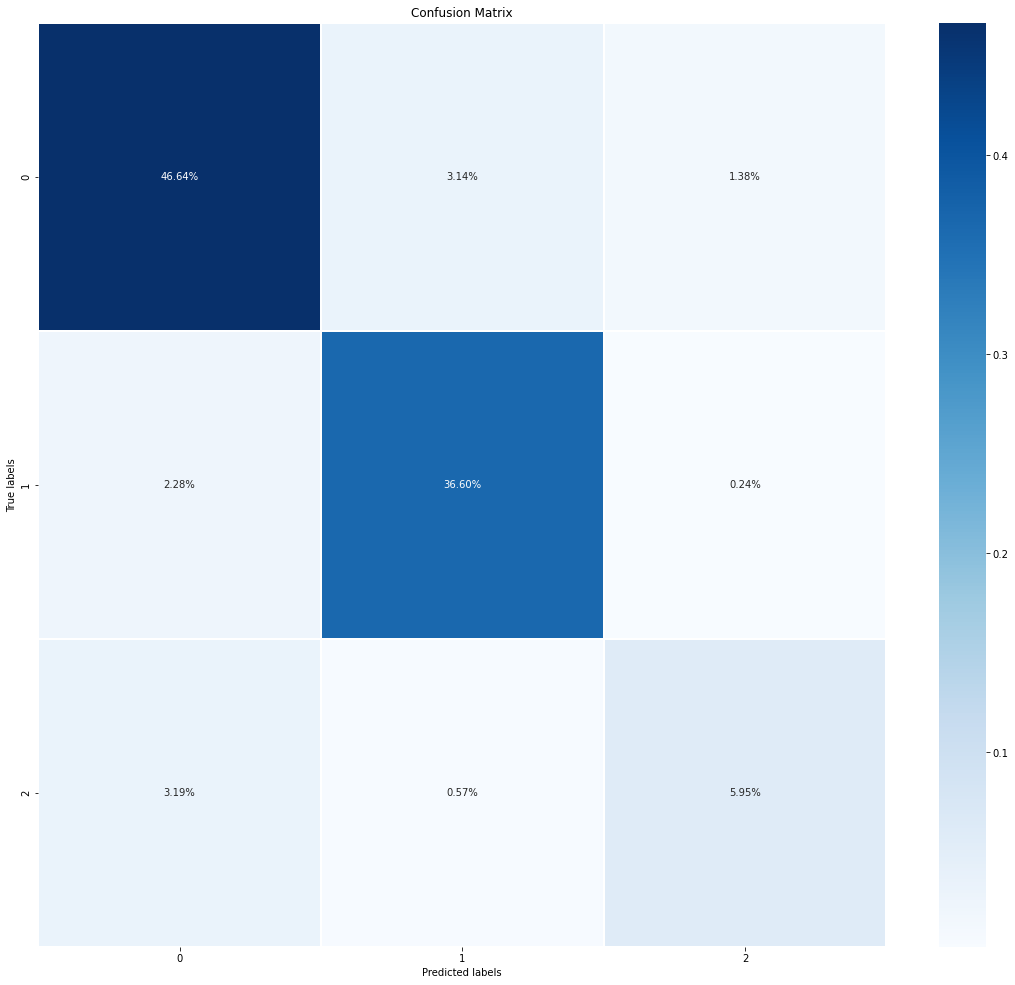

In [18]:
plt.figure(figsize = (19,17))
ax = sns.heatmap(aux/np.sum(aux), annot=True,linewidths=1, fmt=".2%", cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [20]:
y_new =test[train_labels]
prediction= model.predict(y_new)
submission = pd.DataFrame({"Id":test.iloc[:, 0],
                           "Insect":prediction})
submission.to_csv("results.csv",  index=False)